
# Module 2, Notebook 2: Using a neural net to fill in missing electronic conductivity data 

The **High-Throughput Experimental Materials (HTEM) Database** hosted at [htem.nrel.gov](https://htem.nrel.gov) is a publicly accessible platform developed by the National Renewable Energy Laboratory (NREL). It provides a wealth of experimental data on materials synthesized and characterized through high-throughput methods. The database supports the discovery and optimization of novel materials by offering detailed information on composition, structure, processing conditions, and corresponding properties.

Researchers can leverage the HTEM database to:
- Explore large datasets for materials research.
- Identify trends in materials properties and synthesis conditions.
- Accelerate materials development using data-driven approaches.

For more information or to access the database, visit [htem.nrel.gov](https://htem.nrel.gov).



#  Today's lecture - Redefine goal to improve prediction of conductivity from optical and other data



# Load in data and remind where we were from last lecture

In [1]:
import pandas as pd

# File path
input_file = "Filtered_Libraries_Data_wTauc.parquet"

# Read the parquet file
try:
    loaded_data = pd.read_parquet(input_file, engine='pyarrow')
    print("File successfully loaded!")
    print(loaded_data.head())  # Display the first few rows for verification
except FileNotFoundError:
    print(f"File {input_file} not found. Please ensure the file exists.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

File successfully loaded!
       id  num pdac  quality  person_id               sample_date  \
0  212251   34    4      3.0       52.0  2013-03-05T00:00:00.000Z   
1  212253   34    4      3.0       52.0  2013-03-05T00:00:00.000Z   
2  212252   34    4      3.0       52.0  2013-03-05T00:00:00.000Z   
3  212255   34    4      3.0       52.0  2013-03-05T00:00:00.000Z   
4  212254   34    4      3.0       52.0  2013-03-05T00:00:00.000Z   

          owner_name               owner_email xrf_type sputter_operator  ...  \
0  Lauryn Baranowski  l.l.baranowski@gmail.com    maxxi             None  ...   
1  Lauryn Baranowski  l.l.baranowski@gmail.com    maxxi             None  ...   
2  Lauryn Baranowski  l.l.baranowski@gmail.com    maxxi             None  ...   
3  Lauryn Baranowski  l.l.baranowski@gmail.com    maxxi             None  ...   
4  Lauryn Baranowski  l.l.baranowski@gmail.com    maxxi             None  ...   

                                 opt_nirr_wavelength  \
0  [899.9, 901.6

In [2]:
valid_data=loaded_data

In [3]:
valid_data.keys()

Index(['id', 'num', 'pdac', 'quality', 'person_id', 'sample_date',
       'owner_name', 'owner_email', 'xrf_type', 'sputter_operator',
       'sample_ids', 'elements', 'xrf_elements', 'xrf_compounds',
       'deposition_sample_time_min', 'deposition_compounds',
       'deposition_power', 'deposition_base_pressure_mtorr',
       'deposition_growth_pressure_mtorr', 'deposition_target_pulses',
       'deposition_rep_rate', 'deposition_energy', 'deposition_cycles',
       'deposition_ts_distance', 'deposition_initial_temp_c', 'box_number',
       'deposition_gases', 'deposition_substrate_material',
       'deposition_gas_flow_sccm', 'has_xrd', 'has_xrf', 'has_ele', 'has_opt',
       'data_access', 'sample_library_id', 'position', 'thickness',
       'xrf_concentration', 'xrd_angle', 'xrd_background', 'xrd_intensity',
       'fpm_voltage_volts', 'fpm_current_amps', 'fpm_sheet_resistance',
       'fpm_standard_deviation', 'fpm_resistivity', 'fpm_conductivity',
       'absolute_temp_c', 'ele_

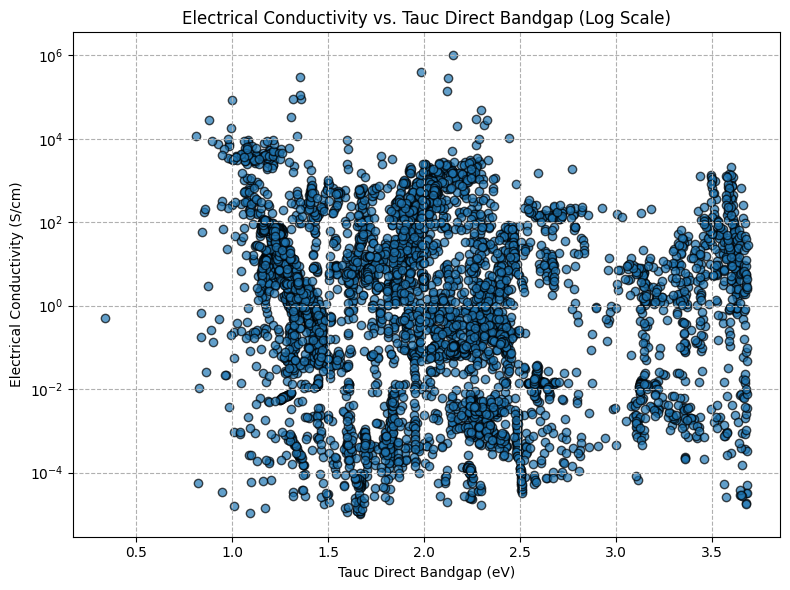

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if the necessary columns are in the DataFrame
if 'fpm_conductivity' in valid_data.columns and 'calc_tauc_direct_bandgap_eV' in valid_data.columns:
    # Extract non-null conductivity and bandgap data
    filtered_data = valid_data[['fpm_conductivity', 'calc_tauc_direct_bandgap_eV']].dropna()

    # Convert to numeric for plotting, handling potential non-numeric entries
    filtered_data['fpm_conductivity'] = pd.to_numeric(filtered_data['fpm_conductivity'], errors='coerce')
    filtered_data['calc_tauc_direct_bandgap_eV'] = pd.to_numeric(filtered_data['calc_tauc_direct_bandgap_eV'], errors='coerce')
    filtered_data = filtered_data.dropna()  # Drop rows with non-numeric data
    
    conductivities = filtered_data['fpm_conductivity']
    bandgaps = filtered_data['calc_tauc_direct_bandgap_eV']

    # Plotting the data with a log scale for the y-axis
    plt.figure(figsize=(8, 6))
    plt.scatter(bandgaps, conductivities, alpha=0.7, edgecolors='k')
    plt.xscale('linear')
    plt.yscale('log')  # Setting y-axis to logarithmic scale
    plt.xlabel('Tauc Direct Bandgap (eV)')
    plt.ylabel('Electrical Conductivity (S/cm)')
    plt.title('Electrical Conductivity vs. Tauc Direct Bandgap (Log Scale)')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()
else:
    print("The required columns ('fpm_conductivity', 'calc_tauc_direct_bandgap_eV') are not present in the DataFrame.")


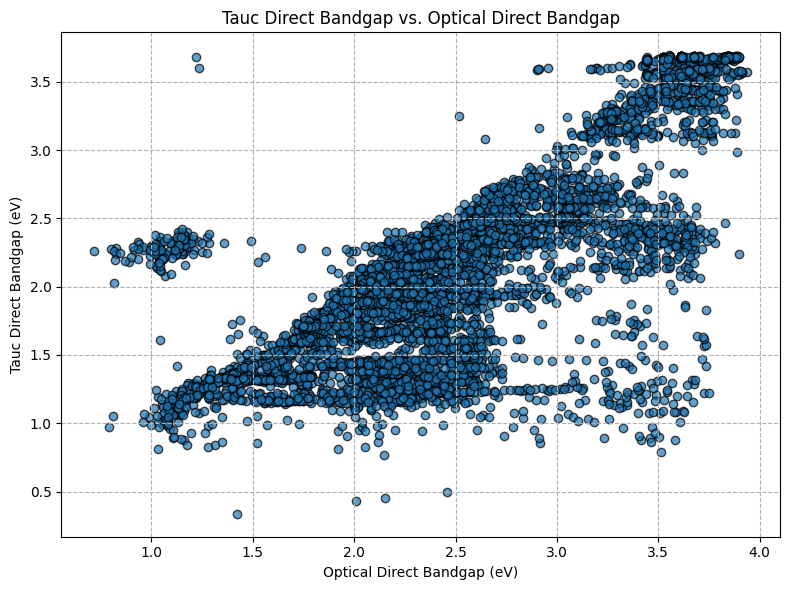

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if the necessary columns are in the DataFrame
if 'calc_tauc_direct_bandgap_eV' in valid_data.columns and 'opt_direct_bandgap' in valid_data.columns:
    # Extract non-null bandgap data
    filtered_data = valid_data[['calc_tauc_direct_bandgap_eV', 'opt_direct_bandgap']].dropna()

    # Convert to numeric for plotting, handling potential non-numeric entries
    filtered_data['calc_tauc_direct_bandgap_eV'] = pd.to_numeric(filtered_data['calc_tauc_direct_bandgap_eV'], errors='coerce')
    filtered_data['opt_direct_bandgap'] = pd.to_numeric(filtered_data['opt_direct_bandgap'], errors='coerce')
    filtered_data = filtered_data.dropna()  # Drop rows with non-numeric data
    
    tauc_bandgaps = filtered_data['calc_tauc_direct_bandgap_eV']
    opt_bandgaps = filtered_data['opt_direct_bandgap']

    # Plotting the data
    plt.figure(figsize=(8, 6))
    plt.scatter(opt_bandgaps, tauc_bandgaps, alpha=0.7, edgecolors='k')
    plt.xlabel('Optical Direct Bandgap (eV)')
    plt.ylabel('Tauc Direct Bandgap (eV)')
    plt.title('Tauc Direct Bandgap vs. Optical Direct Bandgap')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()
else:
    print("The required columns ('calc_tauc_direct_bandgap_eV', 'opt_direct_bandgap') are not present in the DataFrame.")


Optimized value of A: 567955682.4844666


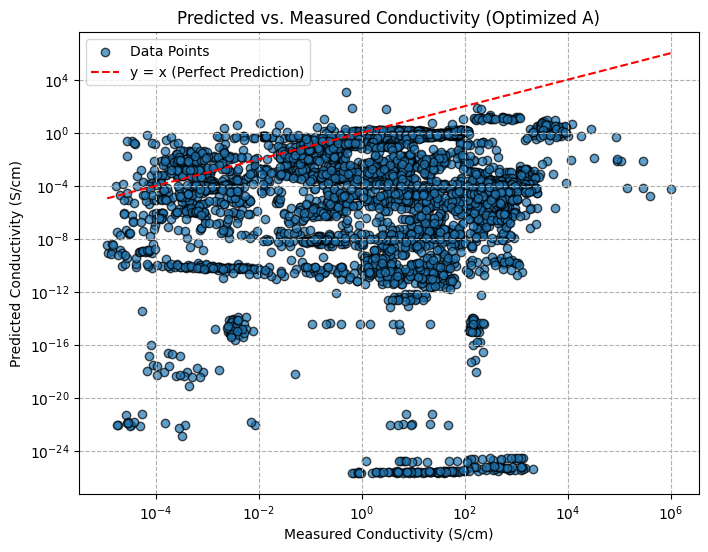

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Constants
k_B = 8.617e-5  # Boltzmann constant in eV/K

# Function to model the electrical conductivity based on the bandgap and parameter A
def conductivity_model(bandgap, temperature, A):
    return A * temperature**(-1.5) * np.exp(-bandgap / (2 * k_B * temperature))

# Objective function to minimize: sum of squared differences between measured and calculated conductivities
def objective_function(A, bandgaps, temperatures, measured_conductivities):
    calculated_conductivities = conductivity_model(bandgaps, temperatures, A)
    return np.sum((measured_conductivities - calculated_conductivities)**2)

# Ensure required columns are present
if 'calc_tauc_direct_bandgap_eV' in valid_data.columns and 'absolute_temp_c' in valid_data.columns and 'fpm_conductivity' in valid_data.columns:
    # Filter rows with non-null values in the required columns
    filtered_data = valid_data[['calc_tauc_direct_bandgap_eV', 'absolute_temp_c', 'fpm_conductivity']].dropna()

    # Convert temperature to Kelvin
    filtered_data['absolute_temp_k'] = filtered_data['absolute_temp_c'] + 273.15

    # Extract measured conductivity, bandgap, and temperature
    measured_conductivities = filtered_data['fpm_conductivity'].values
    bandgaps = filtered_data['calc_tauc_direct_bandgap_eV'].values
    temperatures = filtered_data['absolute_temp_k'].values

    # Ensure valid values (positive conductivities and bandgaps)
    valid_indices = (measured_conductivities > 0) & (bandgaps > 0) & (temperatures > 0)
    measured_conductivities = measured_conductivities[valid_indices]
    bandgaps = bandgaps[valid_indices]
    temperatures = temperatures[valid_indices]

    # Define initial guess for A
    initial_A = 1e20

    # Minimize the objective function
    result = minimize(
        objective_function,
        initial_A,
        args=(bandgaps, temperatures, measured_conductivities),
        method='Nelder-Mead'
    )

    # Extract the optimized value of A
    optimized_A = result.x[0]
    print(f"Optimized value of A: {optimized_A}")

    # Calculate predicted conductivities using the optimized A
    predicted_conductivities = conductivity_model(bandgaps, temperatures, optimized_A)

    # Plot predicted vs. measured conductivity
    plt.figure(figsize=(8, 6))
    plt.scatter(measured_conductivities, predicted_conductivities, alpha=0.7, edgecolors='k', label="Data Points")
    plt.plot([measured_conductivities.min(), measured_conductivities.max()],
             [measured_conductivities.min(), measured_conductivities.max()],
             color='red', linestyle='--', label="y = x (Perfect Prediction)")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Measured Conductivity (S/cm)')
    plt.ylabel('Predicted Conductivity (S/cm)')
    plt.title('Predicted vs. Measured Conductivity (Optimized A)')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("The required columns ('calc_tauc_direct_bandgap_eV', 'absolute_temp_c', 'fpm_conductivity') are not present in the DataFrame.")


Optimized value of A: 19303308.95127952


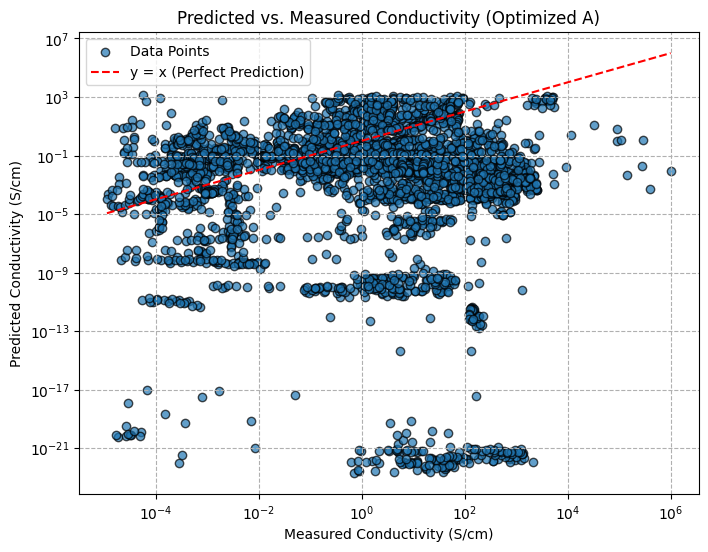

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Constants
k_B = 8.617e-5  # Boltzmann constant in eV/K

# Function to model the electrical conductivity based on the bandgap and parameter A
def conductivity_model(bandgap, temperature, A):
    return A * temperature**(-1.5) * np.exp(-bandgap / (2 * k_B * temperature))

# Objective function to minimize: sum of squared differences between measured and calculated conductivities
def objective_function(A, bandgaps, temperatures, measured_conductivities):
    calculated_conductivities = conductivity_model(bandgaps, temperatures, A)
    return np.sum((measured_conductivities - calculated_conductivities)**2)

# Ensure required columns are present
if 'calc_tauc_indirect_bandgap_eV' in valid_data.columns and 'absolute_temp_c' in valid_data.columns and 'fpm_conductivity' in valid_data.columns:
    # Filter rows with non-null values in the required columns
    filtered_data = valid_data[['calc_tauc_indirect_bandgap_eV', 'absolute_temp_c', 'fpm_conductivity']].dropna()

    # Convert temperature to Kelvin
    filtered_data['absolute_temp_k'] = filtered_data['absolute_temp_c'] + 273.15

    # Extract measured conductivity, bandgap, and temperature
    measured_conductivities = filtered_data['fpm_conductivity'].values
    bandgaps = filtered_data['calc_tauc_indirect_bandgap_eV'].values
    temperatures = filtered_data['absolute_temp_k'].values

    # Ensure valid values (positive conductivities and bandgaps)
    valid_indices = (measured_conductivities > 0) & (bandgaps > 0) & (temperatures > 0)
    measured_conductivities = measured_conductivities[valid_indices]
    bandgaps = bandgaps[valid_indices]
    temperatures = temperatures[valid_indices]

    # Define initial guess for A
    initial_A = 1e20

    # Minimize the objective function
    result = minimize(
        objective_function,
        initial_A,
        args=(bandgaps, temperatures, measured_conductivities),
        method='Nelder-Mead'
    )

    # Extract the optimized value of A
    optimized_A = result.x[0]
    print(f"Optimized value of A: {optimized_A}")

    # Calculate predicted conductivities using the optimized A
    predicted_conductivities = conductivity_model(bandgaps, temperatures, optimized_A)

    # Plot predicted vs. measured conductivity
    plt.figure(figsize=(8, 6))
    plt.scatter(measured_conductivities, predicted_conductivities, alpha=0.7, edgecolors='k', label="Data Points")
    plt.plot([measured_conductivities.min(), measured_conductivities.max()],
             [measured_conductivities.min(), measured_conductivities.max()],
             color='red', linestyle='--', label="y = x (Perfect Prediction)")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Measured Conductivity (S/cm)')
    plt.ylabel('Predicted Conductivity (S/cm)')
    plt.title('Predicted vs. Measured Conductivity (Optimized A)')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("The required columns ('calc_tauc_indirect_bandgap_eV', 'absolute_temp_c', 'fpm_conductivity') are not present in the DataFrame.")


In [14]:
optical_features = []
conductivities = []

if not valid_data.empty:
    # Define a common wavelength grid
    common_wavelengths = np.linspace(300, 900, 500)  # Example range and resolution

    # Initialize new columns
    valid_data['common_wavelengths'] = [common_wavelengths] * len(valid_data)
    valid_data['interpolated_transmittances'] = None
    valid_data['log10_conductivity'] = None

    # Process each row
    for idx, row in valid_data.iterrows():
        wavelengths = np.array(row['opt_wavelength'])
        transmittances = np.array(row['opt_normalized_transmittance'])
        conductivity = row['fpm_conductivity']
        
        if (
            len(wavelengths) == len(transmittances) and 
            len(wavelengths) > 0 and 
            conductivity > 0  # Positive conductivities only
        ):
            # Interpolate transmittances to the common wavelength grid
            interpolated_transmittances = np.interp(common_wavelengths, wavelengths, transmittances)
            # Normalize transmittances
            if interpolated_transmittances.max() > interpolated_transmittances.min():
                interpolated_transmittances = (interpolated_transmittances - interpolated_transmittances.min()) / (
                    interpolated_transmittances.max() - interpolated_transmittances.min()
                )
            else:
                interpolated_transmittances = np.zeros_like(interpolated_transmittances)
            
            # Update columns in valid_data
            valid_data.at[idx, 'interpolated_transmittances'] = interpolated_transmittances
            valid_data.at[idx, 'log10_conductivity'] = np.log10(conductivity)
            
            # Append to features and conductivities
            optical_features.append(interpolated_transmittances)
            conductivities.append(np.log10(conductivity))


In [8]:
# Reset the index of valid_data to ensure alignment
valid_data = valid_data.reset_index(drop=True)

# Save and reload data after interpolating transmittance

In [16]:
comment this line and run to save the combined DataFrame to a file for future use
if not valid_data.empty:
    output_file = "Filtered_Libraries_Data_wTauc_interpolated_trans.parquet"
    valid_data.to_parquet(output_file, engine='pyarrow', index=False)


SyntaxError: invalid syntax (1116991127.py, line 1)

In [2]:
import pandas as pd

# File path
input_file = "Filtered_Libraries_Data_wTauc_interpolated_trans.parquet"

# Read the parquet file
try:
    loaded_data = pd.read_parquet(input_file, engine='pyarrow')
    print("File successfully loaded!")
except FileNotFoundError:
    print(f"File {input_file} not found. Please ensure the file exists.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")


File successfully loaded!


In [3]:
valid_data=loaded_data

In [11]:
valid_data.keys()

Index(['id', 'num', 'pdac', 'quality', 'person_id', 'sample_date',
       'owner_name', 'owner_email', 'xrf_type', 'sputter_operator',
       'sample_ids', 'elements', 'xrf_elements', 'xrf_compounds',
       'deposition_sample_time_min', 'deposition_compounds',
       'deposition_power', 'deposition_base_pressure_mtorr',
       'deposition_growth_pressure_mtorr', 'deposition_target_pulses',
       'deposition_rep_rate', 'deposition_energy', 'deposition_cycles',
       'deposition_ts_distance', 'deposition_initial_temp_c', 'box_number',
       'deposition_gases', 'deposition_substrate_material',
       'deposition_gas_flow_sccm', 'has_xrd', 'has_xrf', 'has_ele', 'has_opt',
       'data_access', 'sample_library_id', 'position', 'thickness',
       'xrf_concentration', 'xrd_angle', 'xrd_background', 'xrd_intensity',
       'fpm_voltage_volts', 'fpm_current_amps', 'fpm_sheet_resistance',
       'fpm_standard_deviation', 'fpm_resistivity', 'fpm_conductivity',
       'absolute_temp_c', 'ele_

In [12]:
valid_data['interpolated_transmittances']

0       [0.0, 0.06032676104316212, 0.11042719601137282...
1       [0.02462100329449711, 0.027840862117682132, 0....
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
6743    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6744    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6745    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6746    [0.019488945437240977, 0.037922003901031676, 0...
6747    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: interpolated_transmittances, Length: 6748, dtype: object

In [4]:
# Filter rows with valid interpolated_transmittances
valid_interpolated = valid_data['interpolated_transmittances'].dropna()

# Ensure all interpolated_transmittances are arrays and remove rows where all values are zero
valid_interpolated = valid_interpolated.apply(
    lambda x: np.array(x) if isinstance(x, (np.ndarray, list)) and not np.all(np.array(x) == 0) else None
)
valid_interpolated = valid_interpolated.dropna()

In [5]:
valid_interpolated

0       [0.0, 0.06032676104316212, 0.11042719601137282...
1       [0.02462100329449711, 0.027840862117682132, 0....
6       [0.01361577957638689, 0.04659506686117642, 0.0...
17      [0.0441469628753861, 0.04921514846221582, 0.07...
18      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
6700    [0.015495529311193055, 0.017725040099040443, 0...
6701    [0.02960682917663208, 0.022492501399626472, 0....
6702    [0.022500216983711498, 0.030195000885701474, 0...
6703    [0.0024939739965102303, 0.009201635058018694, ...
6746    [0.019488945437240977, 0.037922003901031676, 0...
Name: interpolated_transmittances, Length: 3099, dtype: object

# Train MLP to predict conductivity from optical data

## Challenges with Loss Function

- **Magnitude Challenge:** Conductivity spans $10^{-4}$ to $10^{6}$, making direct MSELoss ineffective as larger values dominate loss calculations.  
- **Small Value Suppression:** MSELoss assigns tiny gradients to small values, leading to poor optimization for low-conductivity samples.  
- **Log Transformation:** Applying $log_{10}$ normalizes scale, enabling balanced MSELoss across all conductivity orders.  
- **Alternative Losses:** MSLE or Huber loss in log space ensures stable learning while reducing sensitivity to extreme values.  
- **Hybrid Approach:** Weighting low-conductivity errors or using a custom loss function can balance learning across all scales.  


### Accuracy vs. Interpretability

- **Interpretability:** Loss in log space emphasizes relative differences, making direct interpretation in real units non-trivial.  
- **Small Value Sensitivity:** Log-based loss amplifies small value errors, possibly overemphasizing low-conductivity regions.  
- **Zero Values:** Log transformation fails for zero conductivities, requiring careful data preprocessing.  
- **Balance Tradeoff:** Loss weighting may be needed to avoid overfitting high or low conductivity regions.  


### Huber Loss

Huber loss is a robust loss function that combines MSE for small errors and MAE for large errors:

$$
L_{\delta}(a) =
\begin{cases} 
\frac{1}{2} a^2, & \text{if } |a| \leq \delta \\
\delta (|a| - \frac{1}{2} \delta), & \text{if } |a| > \delta
\end{cases}
$$

where $a = y - \hat{y}$ is the error, and $\delta$ controls the transition point.


- **Robustness:** Huber loss is less sensitive to outliers than MSE, making it useful for noisy data.  
- **Quadratic for Small Errors:** Acts like MSE when errors are small, ensuring smooth optimization.  
- **Linear for Large Errors:** Switches to MAE for large errors, reducing the impact of extreme values.  
- **Hyperparameter $\delta$:** The threshold $\delta$ controls the transition between quadratic and linear behavior.  
- **Good for Log Data:** Works well in log-transformed space, balancing stability and resistance to outliers.  


## Batch size 16, learning_rate = 0.0001, 1000 epochs

Epoch [100/1000], Train Loss: 0.4164, Val Loss: 0.4119
Epoch [200/1000], Train Loss: 0.2795, Val Loss: 0.3534
Epoch [300/1000], Train Loss: 0.2214, Val Loss: 0.3227
Epoch [400/1000], Train Loss: 0.2080, Val Loss: 0.3087
Epoch [500/1000], Train Loss: 0.1655, Val Loss: 0.3034
Epoch [600/1000], Train Loss: 0.1386, Val Loss: 0.2940
Epoch [700/1000], Train Loss: 0.1256, Val Loss: 0.2884
Epoch [800/1000], Train Loss: 0.1640, Val Loss: 0.3088
Epoch [900/1000], Train Loss: 0.1482, Val Loss: 0.3524
Epoch [1000/1000], Train Loss: 0.1220, Val Loss: 0.2973


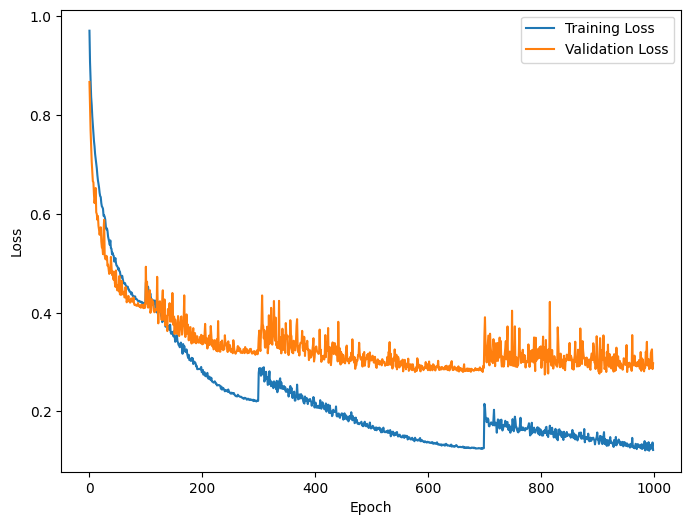

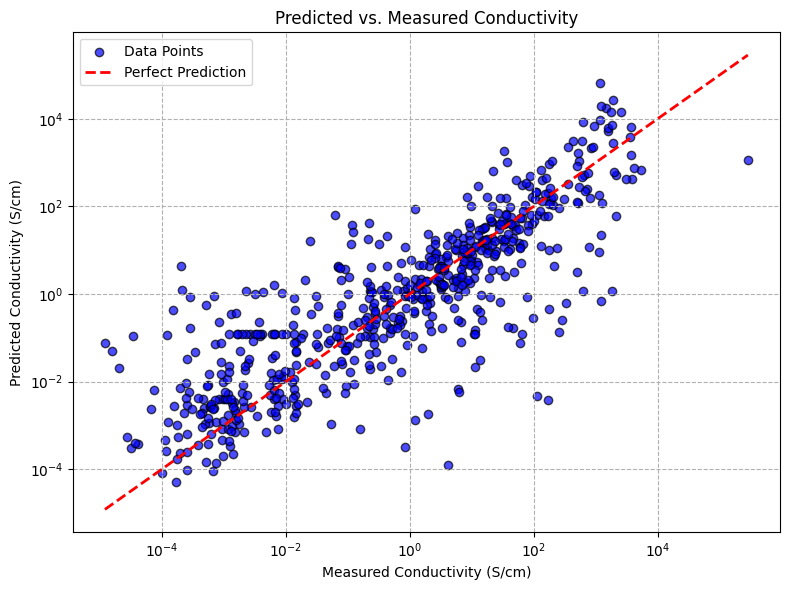

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import os

##############################################
# Declare the MLP architecture
##############################################

class OpticalToConductivityMLP(nn.Module):
    def __init__(self, input_dim):
        super(OpticalToConductivityMLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data: Interpolate transmittance to common wavelengths
##############################################

# Convert data to numpy arrays
X = np.stack(valid_interpolated.values).astype(np.float32)
y = valid_data.loc[valid_interpolated.index, 'log10_conductivity'].values.astype(np.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

##############################################
# Create model instance and set up optimization
##############################################

input_dim = X_train_tensor.shape[1]
net = OpticalToConductivityMLP(input_dim)

learning_rate = 0.0001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

# TensorBoard setup
writer = SummaryWriter()

# Model save directory
model_save_dir = "./models"
os.makedirs(model_save_dir, exist_ok=True)

##############################################
# Train the model
##############################################

num_epochs = 1000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    epoch_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    # Log to TensorBoard
    writer.add_scalar('Loss/train', epoch_train_loss, epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch)

    # Scheduler step
    scheduler.step()

    if (epoch + 1) % 100 == 0:
        torch.save(net.state_dict(), f"{model_save_dir}/model_epoch_{epoch + 1}.pth")

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}')

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##############################################
# Evaluate on test data
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

# Convert log-transformed values back to conductivity
conductivity_pred = 10 ** y_pred
conductivity_actual = 10 ** y_test

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(conductivity_actual, conductivity_pred, color='blue', alpha=0.7, edgecolors='k', label='Data Points')
plt.plot([conductivity_actual.min(), conductivity_actual.max()],
         [conductivity_actual.min(), conductivity_actual.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Measured Conductivity (S/cm)')
plt.ylabel('Predicted Conductivity (S/cm)')
plt.title('Predicted vs. Measured Conductivity')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

writer.close()

# MSELoss = 0.3 -- What is the error on our conductivity value?

## Change batch size, learning rate, and epochs

## Batch size 128, learning_rate = 0.000001, 5000 epochs

Epoch [100/10000], Train Loss: 0.8918, Val Loss: 0.8312
Epoch [200/10000], Train Loss: 0.8560, Val Loss: 0.7861
Epoch [300/10000], Train Loss: 0.7694, Val Loss: 0.6885
Epoch [400/10000], Train Loss: 0.7571, Val Loss: 0.6772
Epoch [500/10000], Train Loss: 0.7367, Val Loss: 0.6547
Epoch [600/10000], Train Loss: 0.6935, Val Loss: 0.6208
Epoch [700/10000], Train Loss: 0.6615, Val Loss: 0.5874
Epoch [800/10000], Train Loss: 0.6548, Val Loss: 0.5840
Epoch [900/10000], Train Loss: 0.6509, Val Loss: 0.5791
Epoch [1000/10000], Train Loss: 0.6400, Val Loss: 0.5706
Epoch [1100/10000], Train Loss: 0.6291, Val Loss: 0.5591
Epoch [1200/10000], Train Loss: 0.6112, Val Loss: 0.5441
Epoch [1300/10000], Train Loss: 0.5896, Val Loss: 0.5258
Epoch [1400/10000], Train Loss: 0.5712, Val Loss: 0.5059
Epoch [1500/10000], Train Loss: 0.5475, Val Loss: 0.4880
Epoch [1600/10000], Train Loss: 0.5408, Val Loss: 0.4867
Epoch [1700/10000], Train Loss: 0.5356, Val Loss: 0.4847
Epoch [1800/10000], Train Loss: 0.5318, 

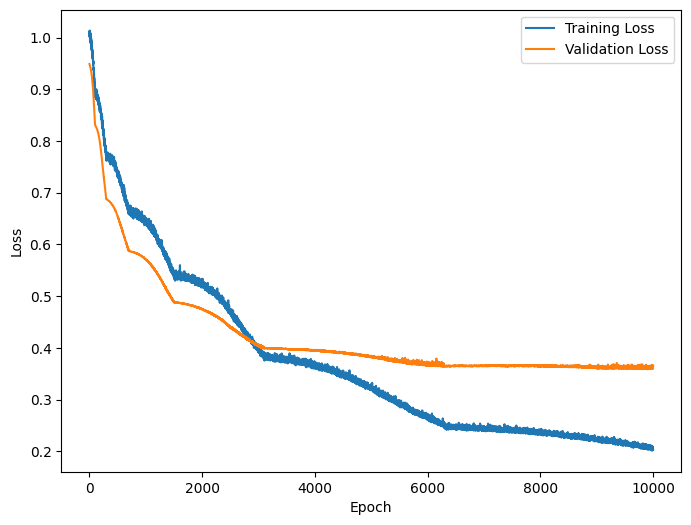

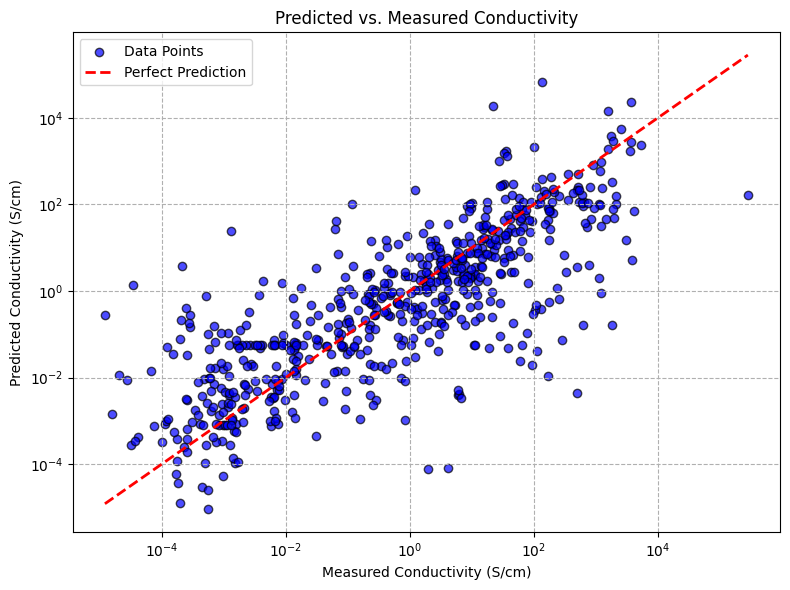

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import os

##############################################
# Declare the MLP architecture
##############################################

class OpticalToConductivityMLP(nn.Module):
    def __init__(self, input_dim):
        super(OpticalToConductivityMLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data: Interpolate transmittance to common wavelengths
##############################################

# Convert data to numpy arrays
X = np.stack(valid_interpolated.values).astype(np.float32)
y = valid_data.loc[valid_interpolated.index, 'log10_conductivity'].values.astype(np.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

##############################################
# Create model instance and set up optimization
##############################################

input_dim = X_train_tensor.shape[1]
net = OpticalToConductivityMLP(input_dim)

learning_rate = 0.000001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

# TensorBoard setup
writer = SummaryWriter()

# Model save directory
model_save_dir = "./models"
os.makedirs(model_save_dir, exist_ok=True)

##############################################
# Train the model
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    epoch_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    # Log to TensorBoard
    writer.add_scalar('Loss/train', epoch_train_loss, epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch)

    # Scheduler step
    scheduler.step()

    if (epoch + 1) % 100 == 0:
        torch.save(net.state_dict(), f"{model_save_dir}/model_epoch_{epoch + 1}.pth")

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}')

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##############################################
# Evaluate on test data
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

# Convert log-transformed values back to conductivity
conductivity_pred = 10 ** y_pred
conductivity_actual = 10 ** y_test

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(conductivity_actual, conductivity_pred, color='blue', alpha=0.7, edgecolors='k', label='Data Points')
plt.plot([conductivity_actual.min(), conductivity_actual.max()],
         [conductivity_actual.min(), conductivity_actual.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Measured Conductivity (S/cm)')
plt.ylabel('Predicted Conductivity (S/cm)')
plt.title('Predicted vs. Measured Conductivity')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

writer.close()


Epoch [100/10000], Train Loss: 0.3896, Val Loss: 0.3587
Epoch [200/10000], Train Loss: 0.3774, Val Loss: 0.3405
Epoch [300/10000], Train Loss: 0.3377, Val Loss: 0.3027
Epoch [400/10000], Train Loss: 0.3328, Val Loss: 0.2984
Epoch [500/10000], Train Loss: 0.3243, Val Loss: 0.2884
Epoch [600/10000], Train Loss: 0.3060, Val Loss: 0.2736
Epoch [700/10000], Train Loss: 0.2840, Val Loss: 0.2597
Epoch [800/10000], Train Loss: 0.2867, Val Loss: 0.2582
Epoch [900/10000], Train Loss: 0.2822, Val Loss: 0.2558
Epoch [1000/10000], Train Loss: 0.2765, Val Loss: 0.2520
Epoch [1100/10000], Train Loss: 0.2725, Val Loss: 0.2466
Epoch [1200/10000], Train Loss: 0.2635, Val Loss: 0.2394
Epoch [1300/10000], Train Loss: 0.2484, Val Loss: 0.2298
Epoch [1400/10000], Train Loss: 0.2368, Val Loss: 0.2208
Epoch [1500/10000], Train Loss: 0.2269, Val Loss: 0.2134
Epoch [1600/10000], Train Loss: 0.2207, Val Loss: 0.2118
Epoch [1700/10000], Train Loss: 0.2208, Val Loss: 0.2110
Epoch [1800/10000], Train Loss: 0.2168, 

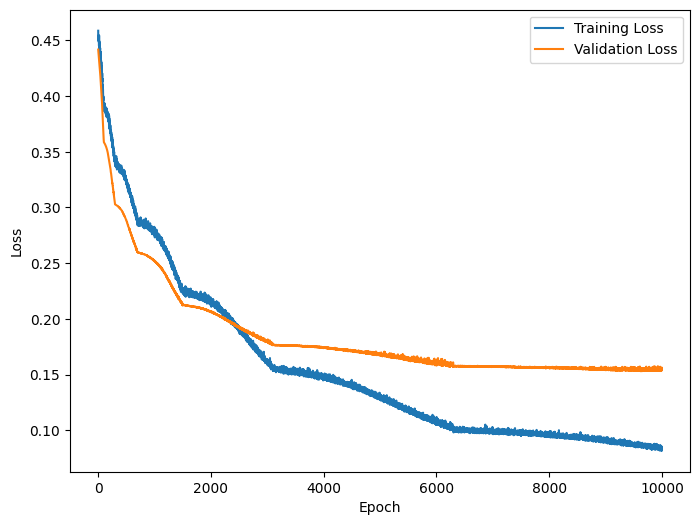

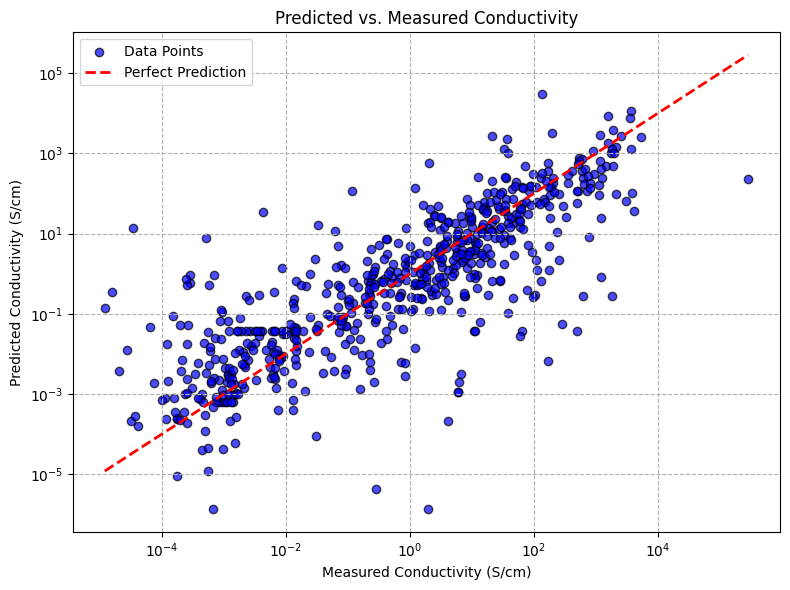

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import os


##############################################
# Declare the MLP architecture
##############################################

class OpticalToConductivityMLP(nn.Module):
    def __init__(self, input_dim):
        super(OpticalToConductivityMLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data: Interpolate transmittance to common wavelengths
##############################################

# Convert data to numpy arrays
X = np.stack(valid_interpolated.values).astype(np.float32)
y = valid_data.loc[valid_interpolated.index, 'log10_conductivity'].values.astype(np.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

##############################################
# Create model instance and set up optimization
##############################################

input_dim = X_train_tensor.shape[1]
net = OpticalToConductivityMLP(input_dim)

learning_rate = 0.000001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.SmoothL1Loss()

# TensorBoard setup
writer = SummaryWriter()

# Model save directory
model_save_dir = "./models"
os.makedirs(model_save_dir, exist_ok=True)

##############################################
# Train the model
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    epoch_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    # Log to TensorBoard
    writer.add_scalar('Loss/train', epoch_train_loss, epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch)

    # Scheduler step
    scheduler.step()

    if (epoch + 1) % 100 == 0:
        torch.save(net.state_dict(), f"{model_save_dir}/model_epoch_{epoch + 1}.pth")

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}')

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##############################################
# Evaluate on test data
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

# Convert log-transformed values back to conductivity
conductivity_pred = 10 ** y_pred
conductivity_actual = 10 ** y_test

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(conductivity_actual, conductivity_pred, color='blue', alpha=0.7, edgecolors='k', label='Data Points')
plt.plot([conductivity_actual.min(), conductivity_actual.max()],
         [conductivity_actual.min(), conductivity_actual.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Measured Conductivity (S/cm)')
plt.ylabel('Predicted Conductivity (S/cm)')
plt.title('Predicted vs. Measured Conductivity')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

writer.close()


# Huber Loss is 0.154 -- how accurate are our conductivity predictions?

In [20]:
valid_data['xrf_concentration']

0          [2.699, 97.3]
1       [0.02559, 99.97]
2          [0.304, 99.7]
3       [0.01392, 99.99]
4         [2.111, 97.89]
              ...       
6743      [61.51, 38.49]
6744      [62.44, 37.56]
6745      [63.57, 36.43]
6746      [64.71, 35.29]
6747      [66.14, 33.86]
Name: xrf_concentration, Length: 6748, dtype: object

# Composition affects conductivity

In [ ]:
# Step 1: Filter valid rows

# Filter out rows with valid data
valid_data = valid_data[
    valid_data['xrf_compounds'].notna() &
    valid_data['xrf_concentration'].notna() &
    (valid_data['fpm_conductivity'] > 0)


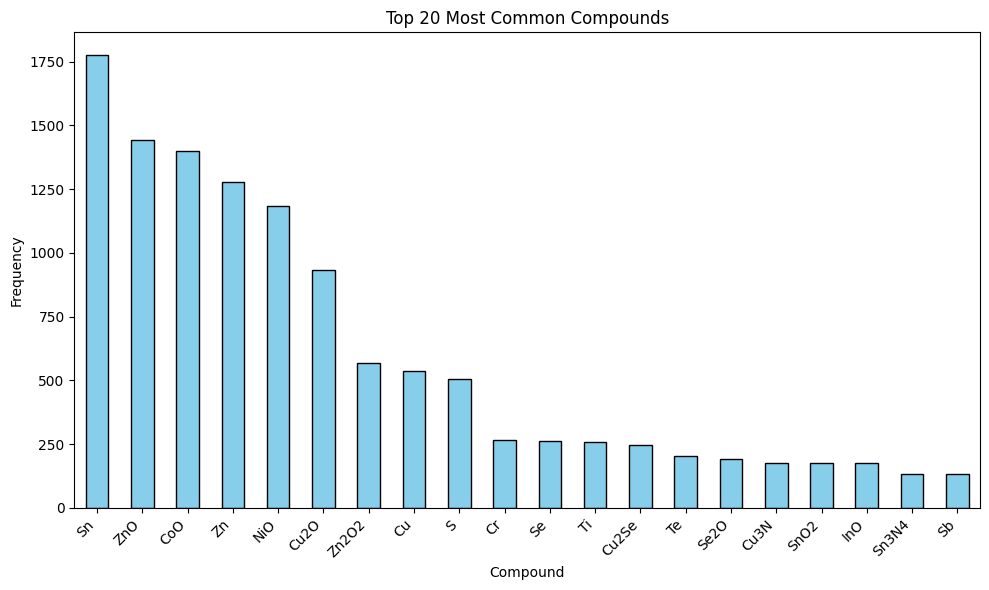

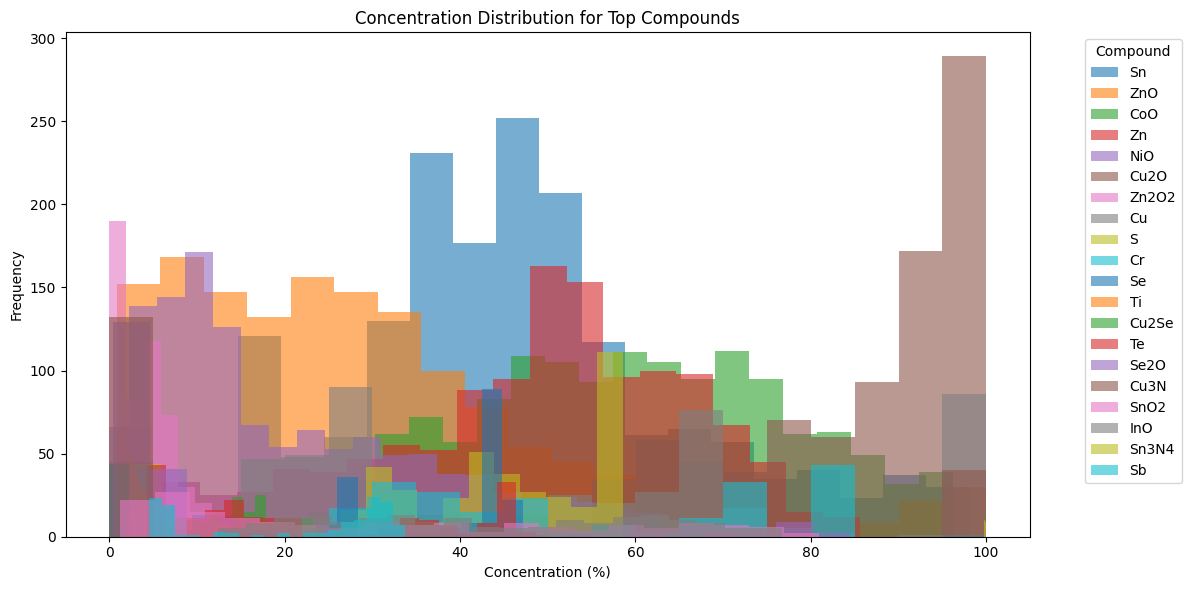

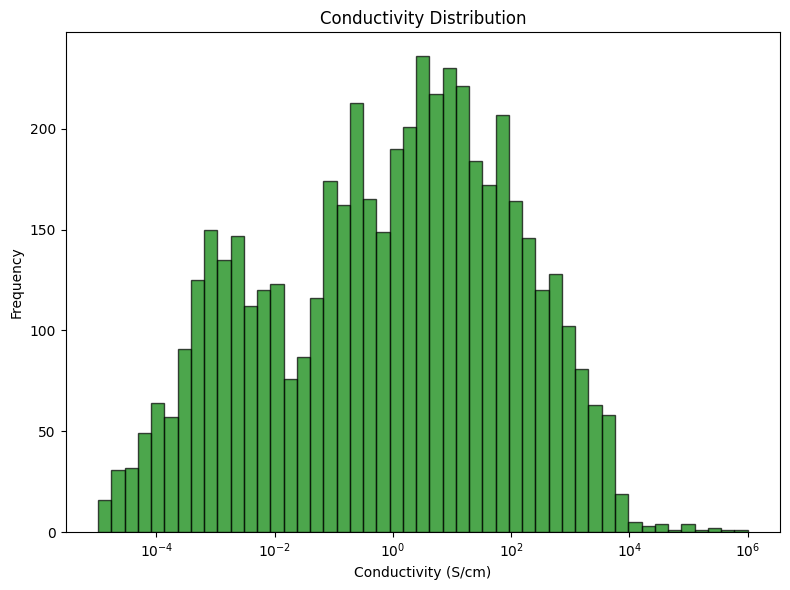

In [22]:
#can you write some code to visualize the distribution of composition and conductivity for this dataset?
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Ensure matching lengths between compounds and concentrations
valid_data = valid_data[
    valid_data.apply(lambda row: len(row['xrf_compounds']) == len(row['xrf_concentration']), axis=1)
]

# Step 3: Explode the data
exploded_data = valid_data.explode(['xrf_compounds', 'xrf_concentration'])

# Step 4: Convert concentrations to float for analysis
exploded_data['xrf_concentration'] = exploded_data['xrf_concentration'].astype(float)

# Step 5: Visualize compound frequencies
compound_counts = exploded_data['xrf_compounds'].value_counts()

plt.figure(figsize=(10, 6))
compound_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Most Common Compounds')
plt.xlabel('Compound')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 6: Visualize concentration distribution for top compounds
top_compounds = compound_counts.head(20).index
concentration_data = exploded_data[exploded_data['xrf_compounds'].isin(top_compounds)]

plt.figure(figsize=(12, 6))
for compound in top_compounds:
    subset = concentration_data[concentration_data['xrf_compounds'] == compound]
    plt.hist(
        subset['xrf_concentration'],
        bins=20,
        alpha=0.6,
        label=compound
    )

plt.title('Concentration Distribution for Top Compounds')
plt.xlabel('Concentration (%)')
plt.ylabel('Frequency')
plt.legend(title='Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 7: Visualize conductivity distribution (logarithmic bins)
conductivity = valid_data['fpm_conductivity']

# Define bins in logarithmic space
log_bins = np.logspace(
    np.log10(conductivity.min()), 
    np.log10(conductivity.max()), 
    50  # Number of bins
)

plt.figure(figsize=(8, 6))
plt.hist(conductivity, bins=log_bins, color='green', alpha=0.7, edgecolor='black')
plt.xscale('log')  # Ensure x-axis is logarithmic
plt.title('Conductivity Distribution')
plt.xlabel('Conductivity (S/cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


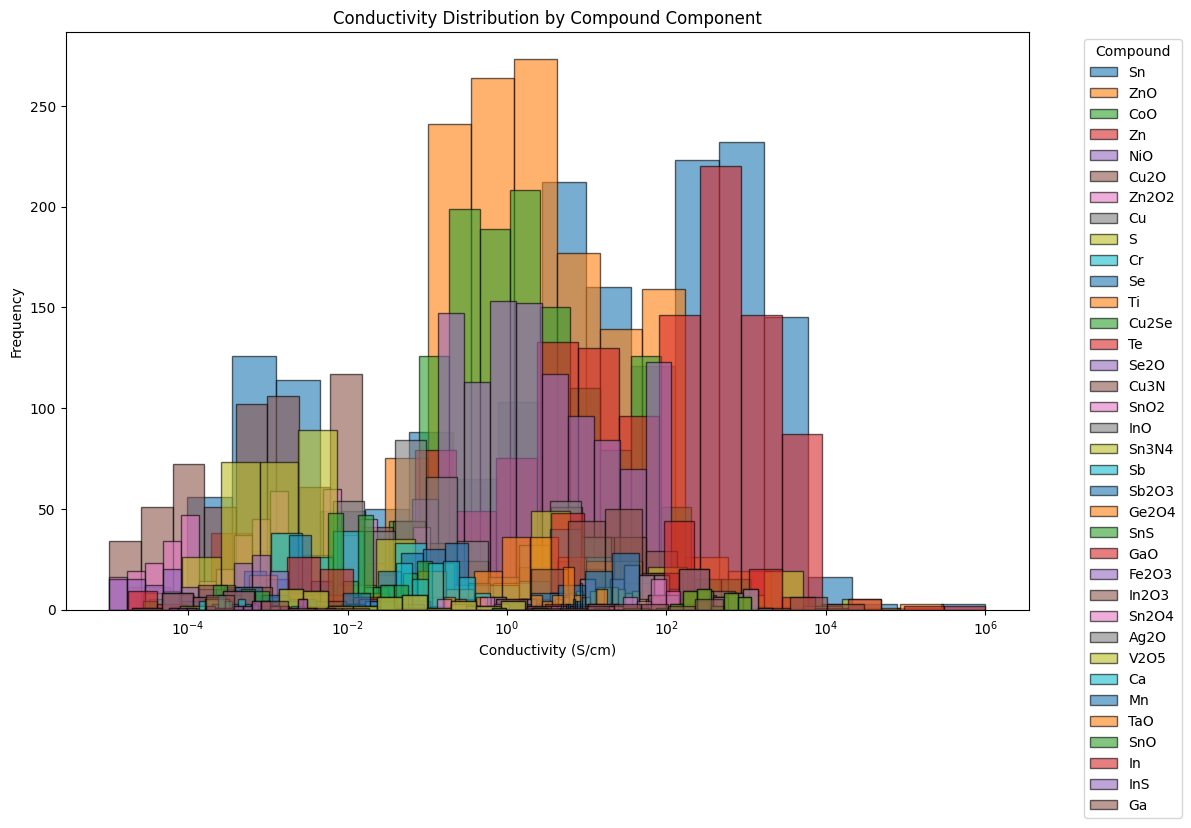

In [23]:
#can you write a new set of code to plot the conductivity distribution separated for each compound component?
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Ensure matching lengths between compounds and concentrations
valid_data = valid_data[
    valid_data.apply(lambda row: len(row['xrf_compounds']) == len(row['xrf_concentration']), axis=1)
]

# Step 3: Explode the data
exploded_data = valid_data.explode(['xrf_compounds', 'xrf_concentration'])

# Step 4: Convert concentrations to float for analysis
exploded_data['xrf_concentration'] = exploded_data['xrf_concentration'].astype(float)

# Step 5: Filter compounds with sufficient data for meaningful histograms
compound_counts = exploded_data['xrf_compounds'].value_counts()
top_compounds = compound_counts[compound_counts > 10].index  # Filter compounds with more than 10 occurrences
filtered_data = exploded_data[exploded_data['xrf_compounds'].isin(top_compounds)]

# Step 6: Plot conductivity distribution for each compound
plt.figure(figsize=(12, 8))

for compound in top_compounds:
    subset = filtered_data[filtered_data['xrf_compounds'] == compound]
    conductivity = subset['fpm_conductivity']

    if len(conductivity) > 0:
        # Define bins in logarithmic space
        log_bins = np.logspace(
            np.log10(conductivity.min()),
            np.log10(conductivity.max()),
            20  # Number of bins
        )

        plt.hist(
            conductivity,
            bins=log_bins,
            alpha=0.6,
            label=compound,
            edgecolor='black'
        )

plt.xscale('log')
plt.title('Conductivity Distribution by Compound Component')
plt.xlabel('Conductivity (S/cm)')
plt.ylabel('Frequency')
plt.legend(title='Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# What does it mean to be Manganese?

### - What features can we add? Do we have other data at our disposal?
### - Our encoding needs to be able to identify trends in the periodic table


# XRD data

In [24]:
valid_data.keys()

Index(['id', 'num', 'pdac', 'quality', 'person_id', 'sample_date',
       'owner_name', 'owner_email', 'xrf_type', 'sputter_operator',
       'sample_ids', 'elements', 'xrf_elements', 'xrf_compounds',
       'deposition_sample_time_min', 'deposition_compounds',
       'deposition_power', 'deposition_base_pressure_mtorr',
       'deposition_growth_pressure_mtorr', 'deposition_target_pulses',
       'deposition_rep_rate', 'deposition_energy', 'deposition_cycles',
       'deposition_ts_distance', 'deposition_initial_temp_c', 'box_number',
       'deposition_gases', 'deposition_substrate_material',
       'deposition_gas_flow_sccm', 'has_xrd', 'has_xrf', 'has_ele', 'has_opt',
       'data_access', 'sample_library_id', 'position', 'thickness',
       'xrf_concentration', 'xrd_angle', 'xrd_background', 'xrd_intensity',
       'fpm_voltage_volts', 'fpm_current_amps', 'fpm_sheet_resistance',
       'fpm_standard_deviation', 'fpm_resistivity', 'fpm_conductivity',
       'absolute_temp_c', 'ele_

In [39]:
#can you write a script to plot a heatmap of all the xrd data in valid_data? normalize the xrd data before plotting

In [13]:
# Reset the index of valid_data to ensure alignment
valid_data = valid_data.reset_index(drop=True)

# Check if the required columns are in valid_data
if 'xrd_angle' in valid_data.columns and 'xrd_intensity' in valid_data.columns:
    # Initialize new columns in valid_data
    valid_data['interpolated_xrd_angle'] = None
    valid_data['interpolated_xrd_intensity'] = None

    # Initialize lists to store the XRD data
    angle_grid = []
    intensity_grid = []

    # Loop through the valid data to collect and normalize XRD patterns
    for idx, row in valid_data.iterrows():
        xrd_angle = row['xrd_angle']
        xrd_intensity = row['xrd_intensity']

        # Ensure xrd_angle and xrd_intensity are iterable and not NaN
        if isinstance(xrd_angle, (list, np.ndarray)) and isinstance(xrd_intensity, (list, np.ndarray)):
            xrd_angle = np.array(xrd_angle)
            xrd_intensity = np.array(xrd_intensity)

            # Ensure that angle and intensity arrays have the same length
            if len(xrd_angle) == len(xrd_intensity) and len(xrd_angle) > 0:
                # Normalize intensity to range [0, 1] for each sample
                intensity_min = np.min(xrd_intensity)
                intensity_max = np.max(xrd_intensity)
                if intensity_max > intensity_min:
                    xrd_intensity = (xrd_intensity - intensity_min) / (intensity_max - intensity_min)
                else:
                    xrd_intensity = np.zeros_like(xrd_intensity)  # Handle constant intensity case

                angle_grid.append(xrd_angle)
                intensity_grid.append(xrd_intensity)

    # Create a common angle grid for interpolation
    common_angles = np.linspace(19, 62, 500)  # Fixed range from 19 to 62 with 500 points

    # Interpolate intensities to match the common angle grid
    for idx, (angles, intensities) in zip(valid_data.index, zip(angle_grid, intensity_grid)):
        interpolated_intensity = np.interp(common_angles, angles, intensities)
        
        # Update valid_data with interpolated values
        valid_data.at[idx, 'interpolated_xrd_angle'] = common_angles
        valid_data.at[idx, 'interpolated_xrd_intensity'] = interpolated_intensity


In [14]:
comment this line and run to save the combined DataFrame to a file for future use
if not valid_data.empty:
    output_file = "Filtered_Libraries_Data_wTauc_interpolated_opt_and_xrd.parquet"
    valid_data.to_parquet(output_file, engine='pyarrow', index=False)


In [15]:
import pandas as pd

# File path
input_file = "Filtered_Libraries_Data_wTauc_interpolated_opt_and_xrd.parquet"

# Read the parquet file
try:
    loaded_data = pd.read_parquet(input_file, engine='pyarrow')
    print("File successfully loaded!")
except FileNotFoundError:
    print(f"File {input_file} not found. Please ensure the file exists.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")


File successfully loaded!


In [16]:
valid_data=loaded_data

In [17]:
# Step 1: Filter valid rows

# Filter out rows with valid data
valid_data = valid_data[
    valid_data['xrd_angle'].notna() &
    valid_data['xrd_intensity'].notna()
]

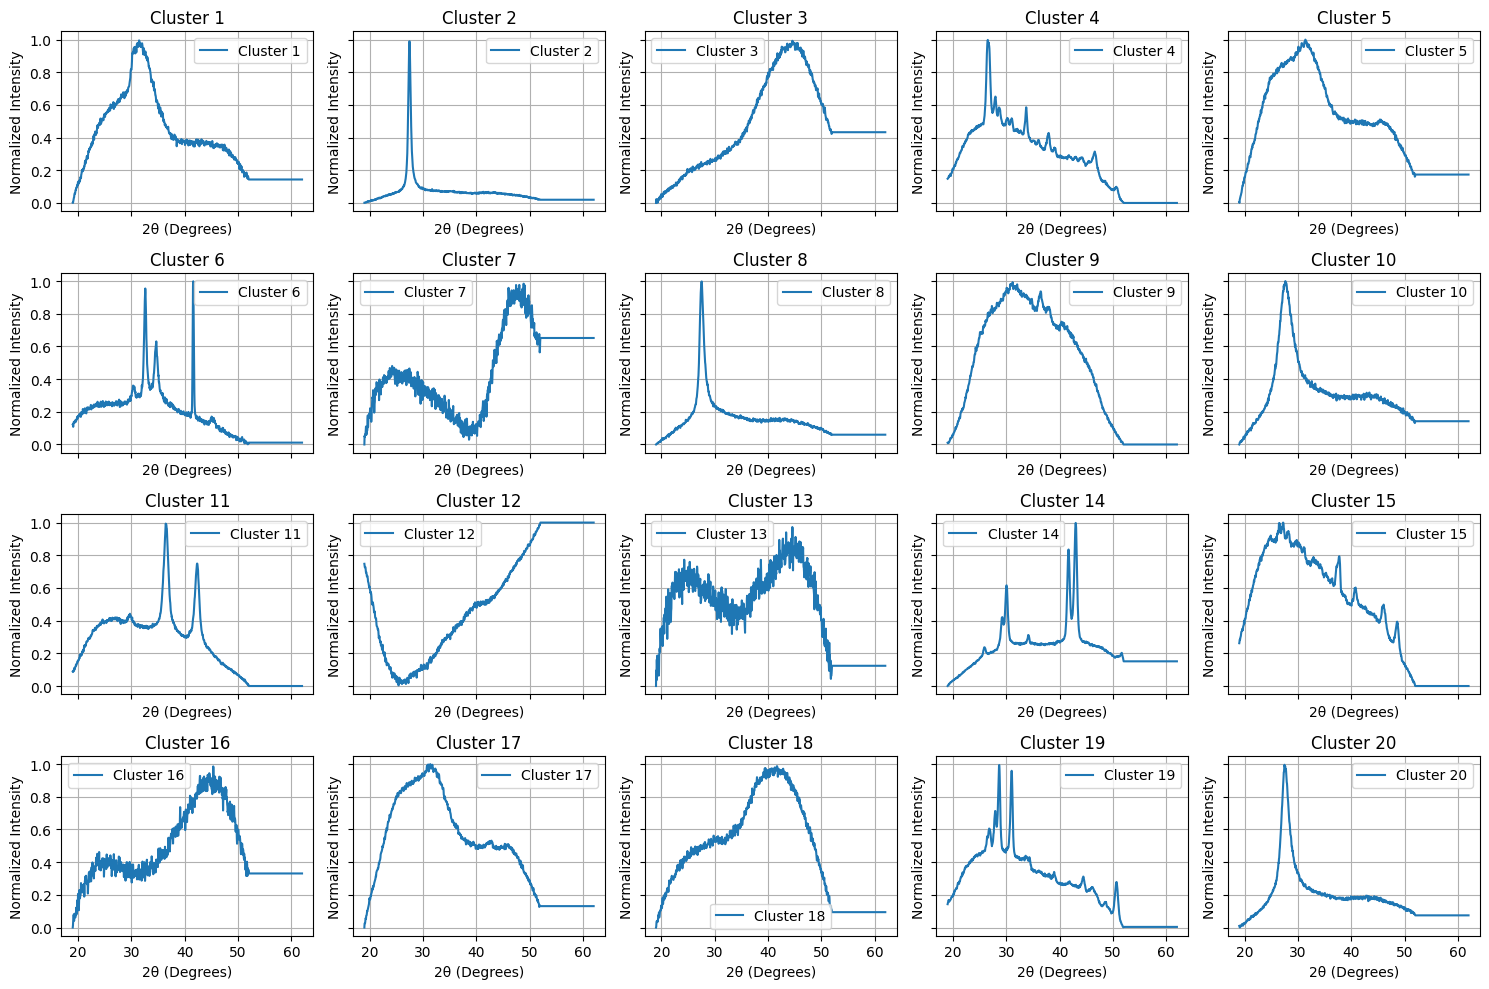

In [18]:

#run kmeans to identify 20 categories of XRD data and plot a grid of separate plots, one from each of the 20 categories
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Check if the required columns are in valid_data
if 'xrd_angle' in valid_data.columns and 'xrd_intensity' in valid_data.columns:
    # Initialize lists to store the XRD data
    angle_grid = []
    intensity_grid = []

    # Loop through the valid data to collect and normalize XRD patterns
    for _, row in valid_data.iterrows():
        xrd_angle = np.array(row['xrd_angle'])
        xrd_intensity = np.array(row['xrd_intensity'])

        # Ensure that angle and intensity arrays have the same length
        if len(xrd_angle) == len(xrd_intensity) and len(xrd_angle) > 0:
            # Normalize intensity to range [0, 1] for each sample
            intensity_min = np.min(xrd_intensity)
            intensity_max = np.max(xrd_intensity)
            if intensity_max > intensity_min:
                xrd_intensity = (xrd_intensity - intensity_min) / (intensity_max - intensity_min)
            else:
                xrd_intensity = np.zeros_like(xrd_intensity)  # Handle constant intensity case

            angle_grid.append(xrd_angle)
            intensity_grid.append(xrd_intensity)

    # Create a common angle grid for interpolation
    common_angles = np.linspace(
        min(np.min(angles) for angles in angle_grid),
        max(np.max(angles) for angles in angle_grid),
        1000  # Number of points in the common grid
    )

    # Interpolate intensities to match the common angle grid
    feature_matrix = []
    for angles, intensities in zip(angle_grid, intensity_grid):
        interpolated = np.interp(common_angles, angles, intensities)
        feature_matrix.append(interpolated)

    # Convert to a numpy array for clustering
    feature_matrix = np.array(feature_matrix)

    # Standardize the feature matrix for clustering
    scaler = StandardScaler()
    feature_matrix_scaled = scaler.fit_transform(feature_matrix)

    # Perform KMeans clustering to identify 20 categories
    n_clusters = 20
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix_scaled)

    # Select one sample from each cluster
    representative_samples = []
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        if len(cluster_indices) > 0:
            representative_samples.append((common_angles, feature_matrix[cluster_indices[0]], cluster))

    # Plot representative samples
    fig, axes = plt.subplots(4, 5, figsize=(15, 10), sharex=True, sharey=True)
    axes = axes.ravel()  # Flatten axes for easy iteration

    for i, (angles, intensities, cluster) in enumerate(representative_samples):
        ax = axes[i]
        ax.plot(angles, intensities, label=f'Cluster {cluster + 1}')
        ax.set_title(f'Cluster {cluster + 1}')
        ax.set_xlabel('2θ (Degrees)')
        ax.set_ylabel('Normalized Intensity')
        ax.legend()
        ax.grid(True)

    # Hide any unused subplots
    for i in range(len(representative_samples), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("The required columns ('xrd_angle' and 'xrd_intensity') are not present in valid_data.")


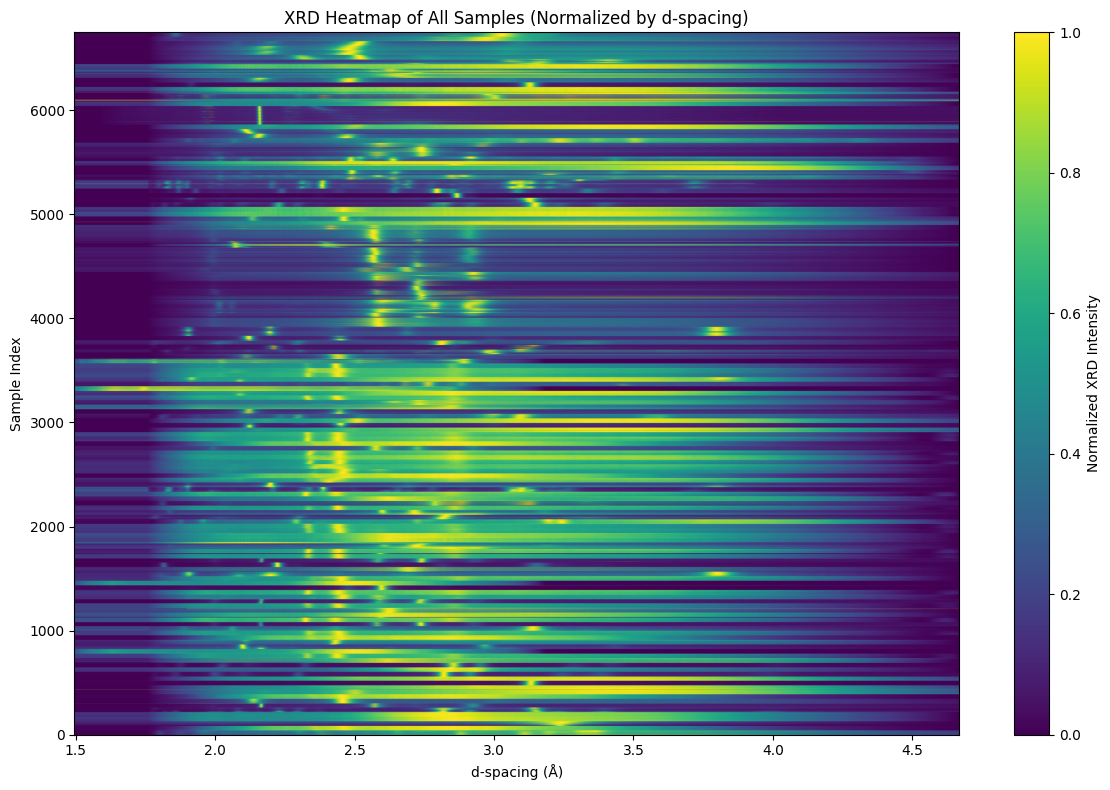

In [19]:
#can you rewrite the below script to (1) convert the diffraction angle  (2theta) to lattice d-spacing using the bragg equation, assuming a Cu kalpha X-ray source, and (2) add the d-spacing to the valid_data dataframe? 

import matplotlib.pyplot as plt
import numpy as np

# Bragg's constant: Cu Kα wavelength in angstroms
lambda_cu = 1.5406  # Å

# Check if the required interpolated columns are in valid_data
if ('interpolated_xrd_angle' in valid_data.columns and 
    'interpolated_xrd_intensity' in valid_data.columns):
    
    # Predefine a new column for d-spacing (set dtype to object by using None)
    valid_data['interpolated_xrd_dspacing'] = None
    
    # Initialize lists to store d-spacing and normalized intensity arrays
    d_spacing_grid = []
    intensity_grid = []
    
    # Loop through valid_data and use the interpolated data
    for idx, row in valid_data.iterrows():
        # Get the interpolated angles and intensities
        xrd_angle = np.array(row['interpolated_xrd_angle'])
        xrd_intensity = np.array(row['interpolated_xrd_intensity'])
        
        # Ensure the arrays are of equal length and non-empty
        if len(xrd_angle) == len(xrd_intensity) and len(xrd_angle) > 0:
            # Convert the diffraction angle (2θ) to θ in radians
            theta = np.radians(xrd_angle / 2)
            # Calculate the lattice d-spacing using Bragg's equation (n=1)
            d_spacing = lambda_cu / (2 * np.sin(theta))
            
            # Normalize the intensity to the [0, 1] range for the sample
            intensity_min = np.min(xrd_intensity)
            intensity_max = np.max(xrd_intensity)
            if intensity_max > intensity_min:
                norm_intensity = (xrd_intensity - intensity_min) / (intensity_max - intensity_min)
            else:
                norm_intensity = np.zeros_like(xrd_intensity)
            
            # Append the computed d-spacing and normalized intensity arrays
            d_spacing_grid.append(d_spacing)
            intensity_grid.append(norm_intensity)
            
            # Convert d_spacing to a list and add it to the DataFrame to avoid the "array element with a sequence" error
            valid_data.at[idx, 'interpolated_xrd_dspacing'] = d_spacing.tolist()
        else:
            valid_data.at[idx, 'interpolated_xrd_dspacing'] = None

    # Create a common d-spacing grid for interpolating the intensities
    common_d_spacing = np.linspace(
        min(np.min(d) for d in d_spacing_grid),
        max(np.max(d) for d in d_spacing_grid),
        1000  # Number of points in the common grid
    )

    # Interpolate each sample's intensity onto the common d-spacing grid.
    # Since d_spacing values generally decrease with increasing 2θ, we ensure ascending order.
    interpolated_intensities = []
    for d_spacing, intensities in zip(d_spacing_grid, intensity_grid):
        # Reverse if needed to ensure ascending order of d-spacing
        if d_spacing[0] > d_spacing[-1]:
            d_spacing_ordered = d_spacing[::-1]
            intensities_ordered = intensities[::-1]
        else:
            d_spacing_ordered = d_spacing
            intensities_ordered = intensities
        
        interpolated = np.interp(common_d_spacing, d_spacing_ordered, intensities_ordered)
        interpolated_intensities.append(interpolated)

    # Convert to a NumPy array for plotting
    heatmap_data = np.array(interpolated_intensities)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    plt.imshow(
        heatmap_data,
        aspect='auto',
        extent=[common_d_spacing[0], common_d_spacing[-1], 0, len(interpolated_intensities)],
        cmap='viridis',
        origin='lower'
    )
    plt.colorbar(label='Normalized XRD Intensity')
    plt.xlabel('d-spacing (Å)')
    plt.ylabel('Sample Index')
    plt.title('XRD Heatmap of All Samples (Normalized by d-spacing)')
    plt.tight_layout()
    plt.show()
else:
    print("The required interpolated columns ('interpolated_xrd_angle' and 'interpolated_xrd_intensity') are not present in valid_data.")


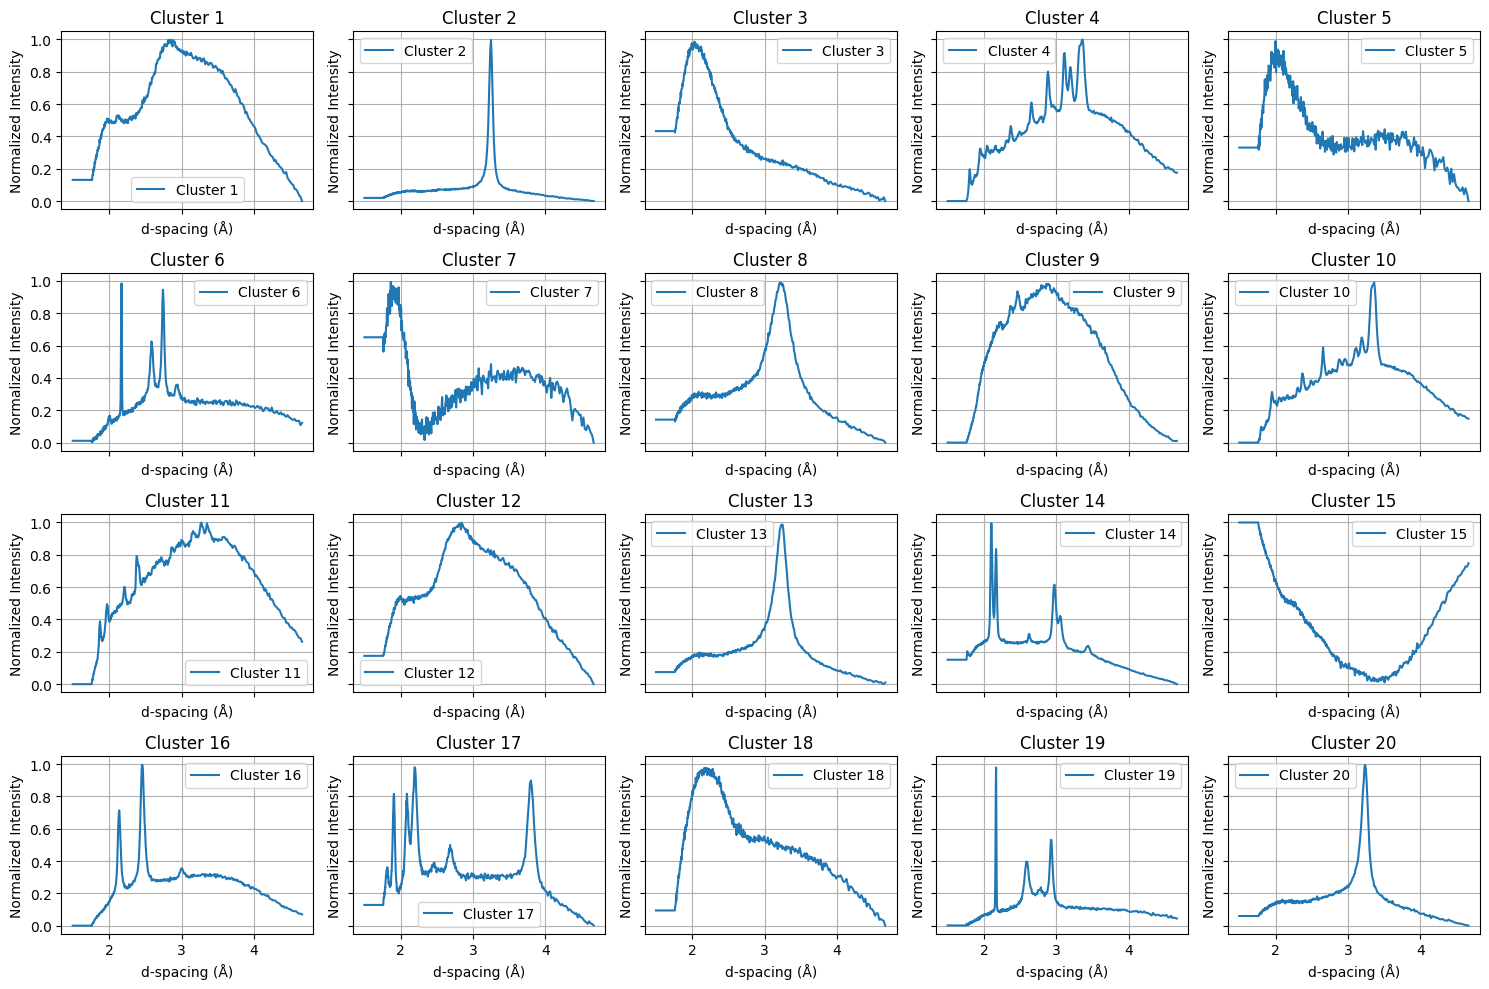

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Check if the required interpolated columns are in valid_data
if ('interpolated_xrd_dspacing' in valid_data.columns and 
    'interpolated_xrd_intensity' in valid_data.columns):
    
    # Use the d-spacing array from the first sample as the common grid
    common_d_spacing = np.array(valid_data.iloc[0]['interpolated_xrd_dspacing'])
    
    # Build the feature matrix from the stored intensity arrays
    feature_matrix = []
    for idx, row in valid_data.iterrows():
        intensity = np.array(row['interpolated_xrd_intensity'])
        # Only add samples that have the expected length
        if len(intensity) == len(common_d_spacing):
            feature_matrix.append(intensity)
    
    feature_matrix = np.array(feature_matrix)
    
    # Standardize the feature matrix for clustering
    scaler = StandardScaler()
    feature_matrix_scaled = scaler.fit_transform(feature_matrix)
    
    # Perform KMeans clustering to identify 20 clusters
    n_clusters = 20
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix_scaled)
    
    # Select one representative sample from each cluster
    representative_samples = []
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        if len(cluster_indices) > 0:
            # Choose the first sample from the cluster as a representative
            representative_samples.append((common_d_spacing, feature_matrix[cluster_indices[0]], cluster))
    
    # Plot representative samples in a 4x5 grid of subplots
    fig, axes = plt.subplots(4, 5, figsize=(15, 10), sharex=True, sharey=True)
    axes = axes.ravel()  # Flatten for easy iteration
    
    for i, (d_spacing, intensities, cluster) in enumerate(representative_samples):
        ax = axes[i]
        ax.plot(d_spacing, intensities, label=f'Cluster {cluster + 1}')
        ax.set_title(f'Cluster {cluster + 1}')
        ax.set_xlabel('d-spacing (Å)')
        ax.set_ylabel('Normalized Intensity')
        ax.legend()
        ax.grid(True)
    
    # Hide any unused subplots
    for i in range(len(representative_samples), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("The required columns ('interpolated_xrd_dspacing' and 'interpolated_xrd_intensity') are not present in valid_data.")


In [21]:
feature_matrix=feature_matrix_scaled

iVAT Reordering: 100%|████████████████████████████████████████████████████████| 6747/6747 [00:00<00:00, 54554.12step/s]


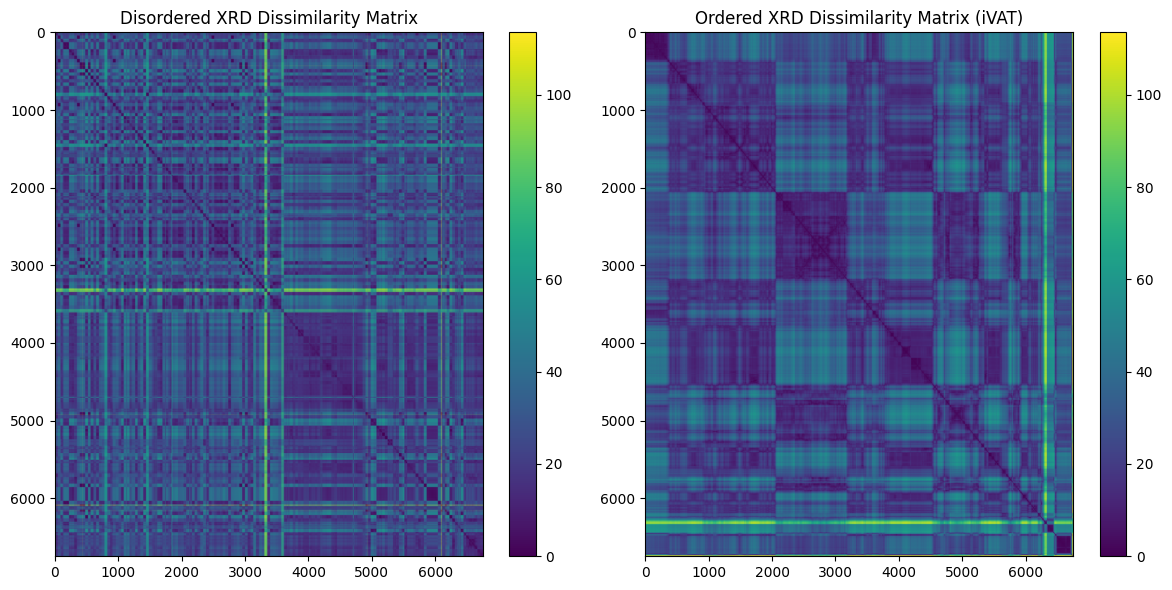

In [22]:
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # Import tqdm for the loading bar

# ------------------------------ iVAT Reordering Function with Progress Bar ------------------------------
def ivat_reorder(distance_matrix):
    """
    Reorders a given distance matrix using the iVAT algorithm.
    
    Parameters:
      - distance_matrix (2D array): Square distance matrix.
    
    Returns:
      - ivat_matrix (2D array): Reordered distance matrix.
      - reorder (list): The reordering of indices applied.
    """
    n = distance_matrix.shape[0]
    reorder = [0]  # Start with the first data point
    remaining = np.setdiff1d(np.arange(n), reorder)  # All remaining points

    # Set up the progress bar for (n-1) steps
    with tqdm(total=n-1, desc="iVAT Reordering", unit="step") as pbar:
        while remaining.size > 0:
            last = reorder[-1]
            nearest_idx = np.argmin(distance_matrix[last, remaining])
            reorder.append(remaining[nearest_idx])
            remaining = np.delete(remaining, nearest_idx)
            pbar.update(1)  # Update progress bar after each step

    return distance_matrix[np.ix_(reorder, reorder)], reorder

# Now, using the XRD feature matrix from the XRD analysis code:
# (Here, feature_matrix is the array of interpolated XRD intensities on the common d-spacing grid.)
if feature_matrix.shape[0] > 1:  # Ensure there are enough samples
    # Compute the pairwise Euclidean distance matrix from the XRD feature matrix
    distance_matrix = ssd.pdist(feature_matrix, metric='euclidean')
    square_distance_matrix = ssd.squareform(distance_matrix)

    # Plot the disordered (original) dissimilarity matrix
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    im1 = axes[0].imshow(square_distance_matrix, cmap='viridis', aspect='auto')
    axes[0].set_title("Disordered XRD Dissimilarity Matrix")
    plt.colorbar(im1, ax=axes[0])

    # Apply the iVAT reordering algorithm with a loading bar
    ivat_distance_matrix, reorder = ivat_reorder(square_distance_matrix)

    # Plot the ordered dissimilarity matrix using iVAT
    im2 = axes[1].imshow(ivat_distance_matrix, cmap='viridis', aspect='auto')
    axes[1].set_title("Ordered XRD Dissimilarity Matrix (iVAT)")
    plt.colorbar(im2, ax=axes[1])

    plt.tight_layout()
    plt.show()
else:
    print("Not enough XRD data for VAT analysis.")


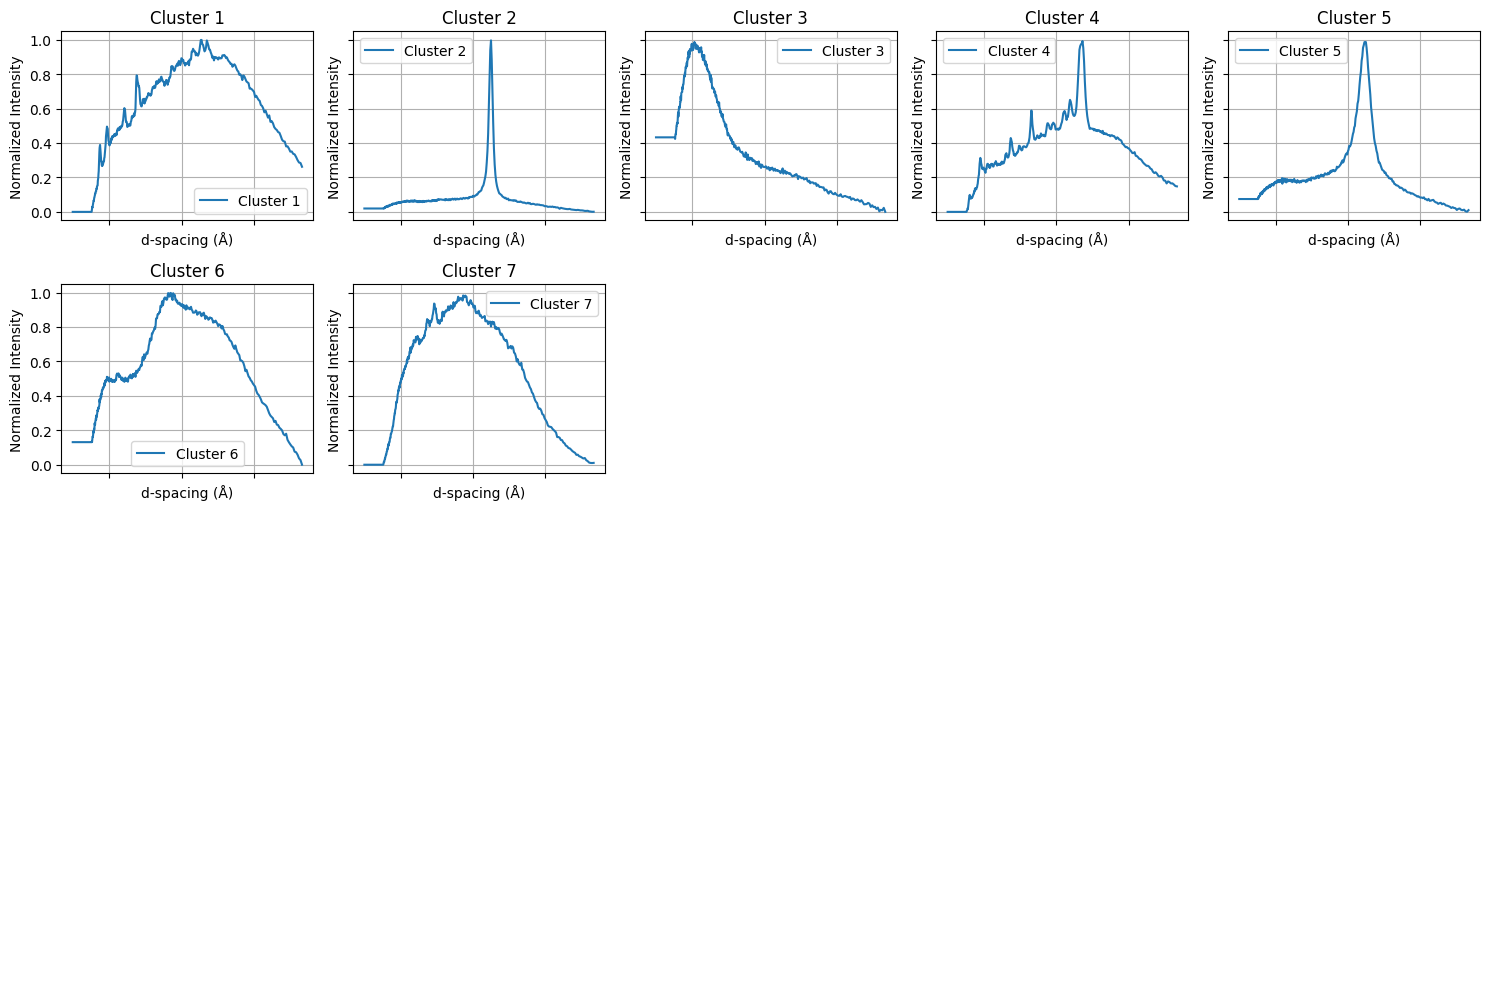

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Check if the required interpolated columns are in valid_data
if ('interpolated_xrd_dspacing' in valid_data.columns and 
    'interpolated_xrd_intensity' in valid_data.columns):
    
    # Use the d-spacing array from the first sample as the common grid
    common_d_spacing = np.array(valid_data.iloc[0]['interpolated_xrd_dspacing'])
    
    # Build the feature matrix from the stored intensity arrays
    feature_matrix = []
    for idx, row in valid_data.iterrows():
        intensity = np.array(row['interpolated_xrd_intensity'])
        # Only add samples that have the expected length
        if len(intensity) == len(common_d_spacing):
            feature_matrix.append(intensity)
    
    feature_matrix = np.array(feature_matrix)
    
    # Standardize the feature matrix for clustering
    scaler = StandardScaler()
    feature_matrix_scaled = scaler.fit_transform(feature_matrix)
    
    # Perform KMeans clustering to identify 20 clusters
    n_clusters = 7
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix_scaled)
    
    # Select one representative sample from each cluster
    representative_samples = []
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        if len(cluster_indices) > 0:
            # Choose the first sample from the cluster as a representative
            representative_samples.append((common_d_spacing, feature_matrix[cluster_indices[0]], cluster))
    
    # Plot representative samples in a 4x5 grid of subplots
    fig, axes = plt.subplots(4, 5, figsize=(15, 10), sharex=True, sharey=True)
    axes = axes.ravel()  # Flatten for easy iteration
    
    for i, (d_spacing, intensities, cluster) in enumerate(representative_samples):
        ax = axes[i]
        ax.plot(d_spacing, intensities, label=f'Cluster {cluster + 1}')
        ax.set_title(f'Cluster {cluster + 1}')
        ax.set_xlabel('d-spacing (Å)')
        ax.set_ylabel('Normalized Intensity')
        ax.legend()
        ax.grid(True)
    
    # Hide any unused subplots
    for i in range(len(representative_samples), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("The required columns ('interpolated_xrd_dspacing' and 'interpolated_xrd_intensity') are not present in valid_data.")


In [23]:
valid_data.keys()

Index(['id', 'num', 'pdac', 'quality', 'person_id', 'sample_date',
       'owner_name', 'owner_email', 'xrf_type', 'sputter_operator',
       'sample_ids', 'elements', 'xrf_elements', 'xrf_compounds',
       'deposition_sample_time_min', 'deposition_compounds',
       'deposition_power', 'deposition_base_pressure_mtorr',
       'deposition_growth_pressure_mtorr', 'deposition_target_pulses',
       'deposition_rep_rate', 'deposition_energy', 'deposition_cycles',
       'deposition_ts_distance', 'deposition_initial_temp_c', 'box_number',
       'deposition_gases', 'deposition_substrate_material',
       'deposition_gas_flow_sccm', 'has_xrd', 'has_xrf', 'has_ele', 'has_opt',
       'data_access', 'sample_library_id', 'position', 'thickness',
       'xrf_concentration', 'xrd_angle', 'xrd_background', 'xrd_intensity',
       'fpm_voltage_volts', 'fpm_current_amps', 'fpm_sheet_resistance',
       'fpm_standard_deviation', 'fpm_resistivity', 'fpm_conductivity',
       'absolute_temp_c', 'ele_

In [24]:
comment this line and run to save the combined DataFrame to a file for future use
if not valid_data.empty:
    output_file = "Filtered_Libraries_Data_wTauc_interpolated_opt_and_xrd_dspacing.parquet"
    valid_data.to_parquet(output_file, engine='pyarrow', index=False)


In [26]:

import pandas as pd

# File path
input_file = "Filtered_Libraries_Data_wTauc_interpolated_opt_and_xrd_dspacing.parquet"

# Read the parquet file
try:
    loaded_data = pd.read_parquet(input_file, engine='pyarrow')
    print("File successfully loaded!")
except FileNotFoundError:
    print(f"File {input_file} not found. Please ensure the file exists.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")


File successfully loaded!


In [27]:
valid_data=loaded_data

In [47]:
valid_data.keys()

Index(['id', 'num', 'pdac', 'quality', 'person_id', 'sample_date',
       'owner_name', 'owner_email', 'xrf_type', 'sputter_operator',
       'sample_ids', 'elements', 'xrf_elements', 'xrf_compounds',
       'deposition_sample_time_min', 'deposition_compounds',
       'deposition_power', 'deposition_base_pressure_mtorr',
       'deposition_growth_pressure_mtorr', 'deposition_target_pulses',
       'deposition_rep_rate', 'deposition_energy', 'deposition_cycles',
       'deposition_ts_distance', 'deposition_initial_temp_c', 'box_number',
       'deposition_gases', 'deposition_substrate_material',
       'deposition_gas_flow_sccm', 'has_xrd', 'has_xrf', 'has_ele', 'has_opt',
       'data_access', 'sample_library_id', 'position', 'thickness',
       'xrf_concentration', 'xrd_angle', 'xrd_background', 'xrd_intensity',
       'fpm_voltage_volts', 'fpm_current_amps', 'fpm_sheet_resistance',
       'fpm_standard_deviation', 'fpm_resistivity', 'fpm_conductivity',
       'absolute_temp_c', 'ele_

Epoch [100/2000], Train Loss: 0.2912, Val Loss: 0.3400
Epoch [200/2000], Train Loss: 0.2540, Val Loss: 0.3072
Epoch [300/2000], Train Loss: 0.1854, Val Loss: 0.2505
Epoch [400/2000], Train Loss: 0.1797, Val Loss: 0.2399
Epoch [500/2000], Train Loss: 0.1623, Val Loss: 0.2242
Epoch [600/2000], Train Loss: 0.1349, Val Loss: 0.2056
Epoch [700/2000], Train Loss: 0.1139, Val Loss: 0.1868
Epoch [800/2000], Train Loss: 0.1103, Val Loss: 0.1841
Epoch [900/2000], Train Loss: 0.1072, Val Loss: 0.1816
Epoch [1000/2000], Train Loss: 0.1028, Val Loss: 0.1794
Epoch [1100/2000], Train Loss: 0.1008, Val Loss: 0.1740
Epoch [1200/2000], Train Loss: 0.0945, Val Loss: 0.1702
Epoch [1300/2000], Train Loss: 0.0818, Val Loss: 0.1680
Epoch [1400/2000], Train Loss: 0.0771, Val Loss: 0.1688
Epoch [1500/2000], Train Loss: 0.0704, Val Loss: 0.1645
Epoch [1600/2000], Train Loss: 0.0657, Val Loss: 0.1628
Epoch [1700/2000], Train Loss: 0.0654, Val Loss: 0.1623
Epoch [1800/2000], Train Loss: 0.0636, Val Loss: 0.1628
E

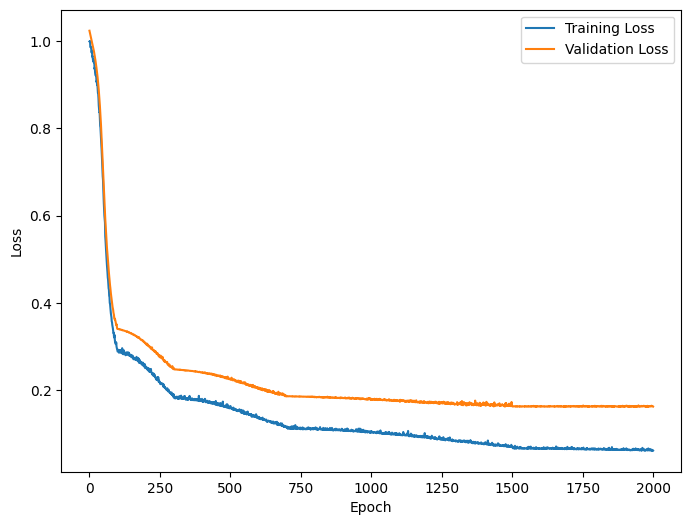

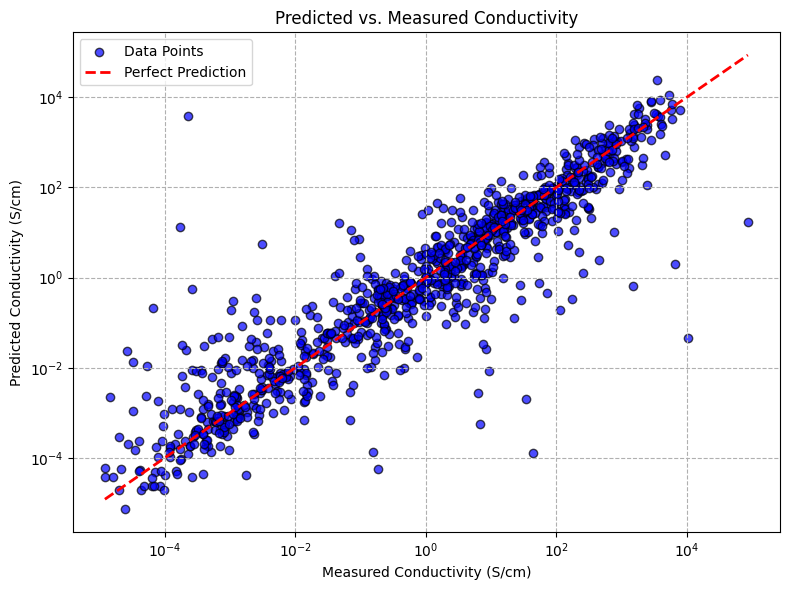

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import os

##############################################
# Declare the MLP architecture
##############################################

class OpticalXRDToConductivityMLP(nn.Module):
    def __init__(self, input_dim):
        super(OpticalXRDToConductivityMLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, 256)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data: Combine optical and XRD data
##############################################

optical_features = []
xrd_features = []
conductivities = []

if not valid_data.empty:
    # Instead of recomputing interpolation, we use the precomputed columns:
    # 'interpolated_transmittances', 'log10_conductivity',
    # 'interpolated_xrd_intensity' (and optionally, 'interpolated_xrd_angle' or 'interpolated_xrd_dspacing')
    for _, row in valid_data.iterrows():
        # Retrieve the pre-interpolated optical data
        optical_interp = np.array(row['interpolated_transmittances'])
        # Retrieve the pre-interpolated XRD intensity data
        xrd_interp = np.array(row['interpolated_xrd_intensity'])
        # Retrieve the log10 conductivity value
        log_cond = row['log10_conductivity']

        # Append data only if the optical and XRD arrays are non-empty
        if optical_interp.size > 0 and xrd_interp.size > 0:
            optical_features.append(optical_interp)
            xrd_features.append(xrd_interp)
            conductivities.append(log_cond)

# Combine features: we horizontally stack the optical and XRD features
X = np.hstack((optical_features, xrd_features))
y = np.array(conductivities, dtype=np.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

##############################################
# Create model instance and set up optimization
##############################################

input_dim = X_train_tensor.shape[1]
net = OpticalXRDToConductivityMLP(input_dim)

learning_rate = 0.000001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

# TensorBoard setup
writer = SummaryWriter()

# Model save directory
model_save_dir = "./models"
os.makedirs(model_save_dir, exist_ok=True)

##############################################
# Train the model
##############################################

num_epochs = 2000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    epoch_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    # Log to TensorBoard
    writer.add_scalar('Loss/train', epoch_train_loss, epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch)

    # Scheduler step
    scheduler.step()

    if (epoch + 1) % 100 == 0:
        torch.save(net.state_dict(), f"{model_save_dir}/model_epoch_{epoch + 1}.pth")

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}')

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##############################################
# Evaluate on test data
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

# Convert log-transformed values back to conductivity
conductivity_pred = 10 ** y_pred
conductivity_actual = 10 ** y_test

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(conductivity_actual, conductivity_pred, color='blue', alpha=0.7, edgecolors='k', label='Data Points')
plt.plot([conductivity_actual.min(), conductivity_actual.max()],
         [conductivity_actual.min(), conductivity_actual.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Measured Conductivity (S/cm)')
plt.ylabel('Predicted Conductivity (S/cm)')
plt.title('Predicted vs. Measured Conductivity')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

writer.close()

# MSE Loss is 0.1619 - How accurate are our predicted conductivities?

# Practice: work to improve features

As we expanded the model to include XRD and optical data, we now have 1000 features. Do we need this many? What features were most important and why?

## 1) Feature selection
- **a)** Make a Pearson Correlation Matrix to show which XRD and optical features correlate most strongly with conductivity.
- **b)** What patterns do you see in this data? How do you interpret them?

## 2) Feature reduction
- **a)** How many PCA components for the combined XRD and optical data are necessary to describe 95% of the variance in the conductivity?
- **b)** Perform a UMAP projection of the combined XRD and optical data into 2 dimensions. Does the data indicate separability?
- **c)** Can you reduce the model complexity or improve the model accuracy by using one of these feature reduction techniques?